## Implementación del método de Euler

Para obtener una solución aproximada de la ecuación diferencial:

$$\frac{dx}{dt}=f(x,t),$$

utilizando el método de Euler, se implementa la siguiente fórmula de recurrencia:

$$x_{k+1}=x_k+f(x_k,t_k)h$$

donde $x_k=x(t_k)$.


## Ejercicio 1
Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.

In [1]:
function eulerMethod(f,t0,x0,tf,h)  #Función eulerMethod cuyas entradas son la función f, los tiempos inicial y final, el punto inicial x0 y el tamaño de paso h.
    t = linspace(t0,tf,(tf-t0)/h)   #Creamos un intervalo cuyos extremos son los tiempos inicial y final, que tiene n elementos, considerando n=(tf-t0)/h
    x=zeros((tf-t0)/h)            #Creamos un arreglo de n elementos donde se irán guardando las x´s obtenidas con el método de Euler.
    x[1]=x0                         #Condición inicial
    for i in 2:length(t)            #Ciclo for para implementar la fórmula de recurrencia mostrada arriba.
        x[i] = x[i-1] + h*f(t[i-1],x[i-1])
    end
    return(t,x)                     #La función eulerMethod arroja los valores obtenidospara t y x.
end

eulerMethod (generic function with 1 method)

* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [2]:
function f(t,x)           #Función f para probar la función creada para implementar el método de Euler
    return -2.5*x
end

f (generic function with 1 method)

In [3]:
#Estas 4 listas almacenarán los resultados obtenidos utilizando la función eulerMethod, variando el tamaño de paso, para h=1.0,0.5,0.2,0.01 y utilizando la condición inicial x(0)=1.
t1,x1 = eulerMethod(f,0,1,8,1);       
t2,x2 = eulerMethod(f,0,1,8,0.5);
t3,x3 = eulerMethod(f,0,1,8,0.2);
t4,x4 = eulerMethod(f,0,1,8,0.01);

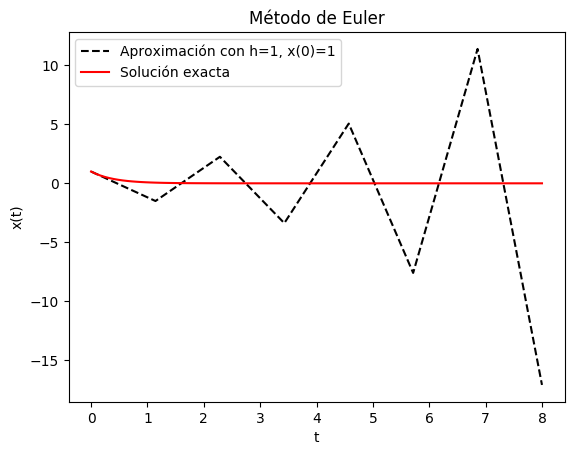

In [4]:
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
plot(t1,x1, color="black", "--", label = "Aproximación con h=1, x(0)=1" )   #Graficamos los puntos obtenidos con el método de Euler, utilizando un tamaño de paso h=1
legend()
xs = linspace(0,8,100)          #Intervalo a considerar
ys = map(x -> exp(-2.5*x), xs)  
plot(xs,ys,color="red", label = "Solución exacta")         #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

Como se observa en la gráfica, el tamaño de paso h=1 es muy grande, ocasionando que la aproximación a la solución de la ecuación diferencial no se parezca a la gráfica de la solución exacta.

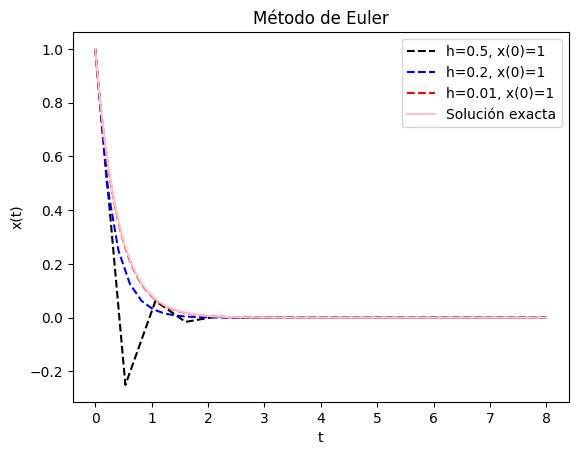

In [5]:
#Graficamos los puntos obtenidos con el método de Euler, considerando h=0.5,0.2 y 0.01.
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
plot(t2,x2, color="black", "--", label = "h=0.5, x(0)=1")
legend()
plot(t3,x3, color="blue", "--", label = "h=0.2, x(0)=1")
legend()
plot(t4,x4, color="red", "--", label = "h=0.01, x(0)=1")
legend()
xs = linspace(0,8,100)    #Intervalo a considerar
ys = map(x -> exp(-2.5*x), xs)
plot(xs,ys,color="pink", label = "Solución exacta")  #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

Como se observa en la gráfica, a medida que el tamaño de paso disminuye, la aproximación a la solución utilizando el método de Euler se va acercando cada vez más a la solución exacta.

Probando ahora con x(0)=2

In [6]:
#Estas 4 listas almacenarán los resultados obtenidos utilizando la función eulerMethod, variando el tamaño de paso, para h=1.0,0.5,0.2,0.01 y utilizando la condición inicial x(0)=2.
t5,x5 = eulerMethod(f,0,2,8,1);
t6,x6 = eulerMethod(f,0,2,8,0.5);
t7,x7 = eulerMethod(f,0,2,8,0.2);
t8,x8 = eulerMethod(f,0,2,8,0.01);

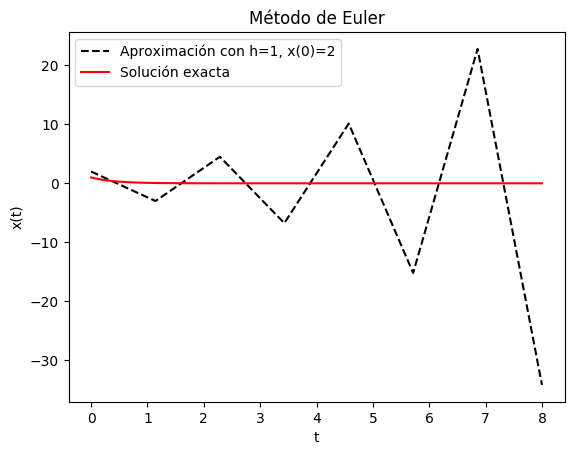

In [7]:
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
plot(t5,x5, color="black", "--", label = "Aproximación con h=1, x(0)=2") #Graficamos los puntos obtenidos con el método de Euler, utilizando un tamaño de paso h=1
legend()
xs = linspace(0,8,100)    #Intervalo a considerar
ys = map(x -> exp(-2.5*x), xs)
plot(xs,ys,color="red", label = "Solución exacta")   #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

Como se observa en la gráfica, el tamaño de paso h=1 es muy grande, ocasionando que la aproximación a la solución de la ecuación diferencial no se parezca a la gráfica de la solución exacta.

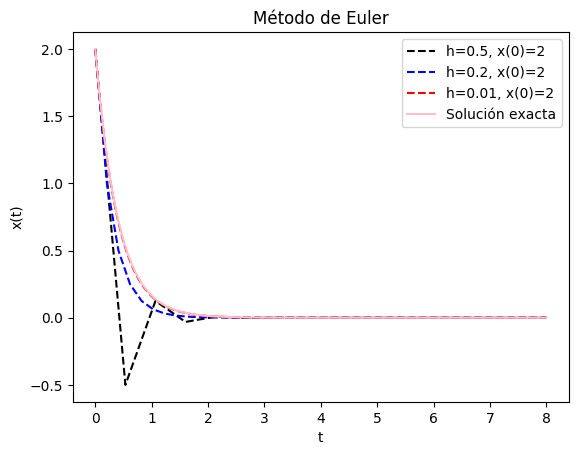

In [8]:
#Graficamos los puntos obtenidos con el método de Euler, considerando h=0.5,0.2 y 0.01.
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
plot(t6,x6, color="black", "--", label = "h=0.5, x(0)=2")
legend()
plot(t7,x7, color="blue", "--", label = "h=0.2, x(0)=2")
legend()
plot(t8,x8, color="red", "--", label = "h=0.01, x(0)=2")
legend()
xs = linspace(0,8,100)    #Intervalo a considerar
ys = map(x -> 2*exp(-2.5*x), xs)
plot(xs,ys,color="pink", label = "Solución exacta")  #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

Como se observa en la gráfica, a medida que el tamaño de paso disminuye, la aproximación a la solución utilizando el método de Euler se va acercando cada vez más a la solución exacta.

### Desacoplamiento de ecuaciones diferenciales de orden 2.

## Ejercicio 2:
¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?

Esta ecuación diferencial describe el oscilador armónico simple, cuya aceleración es directamente proporcional al desplazamiento, pero opuesta en dirección.

Aquí la masa se considero como 1kg.

$$m\ddot{x} =
-kx$$



* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.

$$\ddot{x} = -kx$$

Reagrupando tenemos:

$$\ddot { x } +kx=0$$

La ecuación característca es:

$${ \lambda  }^{ 2 }+k =0$$

y las correspondientes raíces son: ${ \lambda  }=\pm i\sqrt { k } $. Por lo que la solución general es de la forma:

$$ x(t)=Acos\left( \sqrt { k } t \right) +Bsin\left( \sqrt { k } t \right) ... (1)$$

Derivando esta expresión, obtenemos:

$$x'(t)=-A\sqrt { k } sin\left( \sqrt { k } t \right) +B\sqrt { k } cos\left( \sqrt { k } t \right) $$

Considerando las condiciones iniciales $x(0)$ y $x'(0)$ obtenemos:

$$ x(0)=Acos\left( 0 \right) +Bsin\left( 0 \right) =A $$

$$ x'(0)=-A\sqrt { k } sin\left( 0 \right) +B\sqrt { k } cos\left( 0 \right) =B\sqrt { k }  $$

Por lo que: $ A=x(0)$ y $B=\frac { x'(0) }{ \sqrt { k }  } $, y en consecuencia:

$$ x(t)=x(0)cos\left( \sqrt { k } t \right) +\frac { x'(0) }{ \sqrt { k }  } sin\left( \sqrt { k } t \right) $$

que es la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.

Podemos escribir (1) en la forma fase-amplitud:

$$ x(t)=Rcos\left( \sqrt { k } t-\phi  \right)   ...(2) $$ 

Para ver la relación entre (1) y (2) utilizamos la identidad trigonométrica para el coseno de la diferencia de 2 ángulos: $ \sqrt { k } t $ y $ \phi  $, para escribir (2) como:

$$ x(t)=Rcos\left( \phi  \right) cos\left( \sqrt { k } t \right) +Rsin\left( \phi  \right) sin\left( \sqrt { k } t \right) ...(3) $$

Comparando (1) y (3), llegamos a que:

$$ A=Rcos\left( \phi  \right) $$ y $$ B=Rsin\left( \phi  \right)  $$

Por lo que se observa que $ (R, \phi ) $  es la representación en coordenadas polares, considerando $ R=\sqrt { { A }^{ 2 }+{ B }^{ 2 } }  $.

## Ejercicio 3:
Haz $v = \dot{x}(t)$ y calcula la derivada de
$v$ ¿qué obtienes y como se relaciona con el sistema
original?

Al  hacer $v = \dot{x}(t)$ y calcular su derivada, obtenemos:

$$ \dot { v } =\ddot { x }(t) =-kx(t) $$

Si llevaste a cabo el ejercicio anterior, te darás cuenta
que terminas con un sistema acoplado de ecuaciones
diferenciales:

$$
\dot{v} = -kx, \dot{x} = v,
$$

Con este sistema acoplado puedes utilizar el método de
Euler en su forma vectorial:
$$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$
donde $\vec x=(x,v)$, y para este caso es facil ver que $\vec f(\vec x,t)=(v,-kx).$

El sistema acoplado obtenido está relacionado con el sistema original, considerando a v como la velocidad del oscilador armónico y a x como su posición, siendo $x(0)={ x }_{ 0 }$ y $v(0)={ v }_{ 0 }$ las condiciones iniciales que indican la posición y velocidad iniciales, respectivamente. 

## Ejercicio 4:
Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

In [9]:
# Podemos utilizar la función vista en clase para el método de Euler independiente de las dimensiones del sistema.
function metodo_euler(f,list,x0)    # Función metodo_euler cuyas entradas son la función f, list que es el intervalo de tiempo y el punto inicial x0.
    x = x0                          # Condición inicial
    h = list[2]-list[1]             # El tamaño de paso h se obtiene de restar los primeros 2 elementos de la lista.
    listx = []                      # Arreglo vacío que guardará los resultados obtenidos con este método.
    push!(listx,x)                  # Agregamos al arreglo listx, el punto inicial con push
    for i in 2:length(list)         # Ciclo for que implementará la fórmula de recurrencia mostrada arriba para el método de Euler 
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x)              # Para cada vuelta del ciclo, se agrega el resultado obtenido al arreglo listx 
    end
    return listx                    #La función metodo_euler regresa listx
end

metodo_euler (generic function with 1 method)

In [10]:
f(x,t) = [x[2], -x[1]]     # Función de 2 dimensiones (v, -kx), considerando k=1
list = 0:0.001:50;         # Intervalo de tiempo a considerar
vec = metodo_euler(f,list,[1,0]);   # El vector vec contiene la solución de nuestro sistema con las condiciones x(0)=1 y v(0)=0 
listx1 = map(x->x[1],vec);          # Con estas listas se extraen las variables y se mapean sobre el vector vec
listx2 = map(x->x[2],vec);

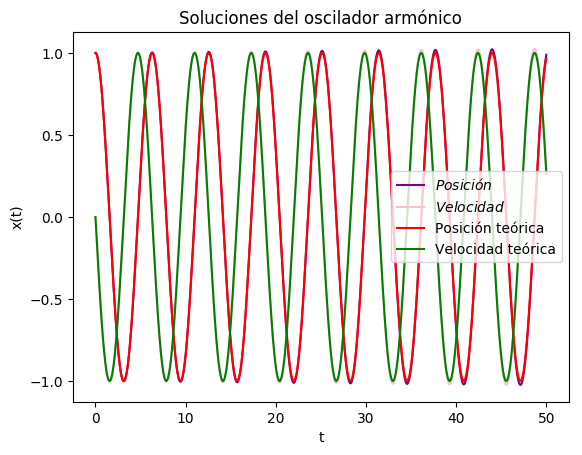

In [11]:
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Soluciones del oscilador armónico") 
plot(list,listx1, color ="purple", label = L"Posición")                   # Graficando las soluciones obtenidas. 
legend()
plot(list,listx2, color ="pink", label = L"Velocidad");
legend()

#Con lo que se muestra a continuación se van a graficar las soluciones teóricas al oscilador armónico en el intervalo propuesto.
sol = cos.(list)                    
der_sol = -sin.(list)
plot(list, sol,  color ="red", label = "Posición teórica")
legend()
plot(list, der_sol,  color ="green", label = "Velocidad teórica")
legend()
show()

Como se observa en la gráfica, las soluciones obtenidas con el método de Euler y las soluciones teóricas se sobrelapan, por lo que tenemos una buena aproximación.

## Ejercicio 5:
Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

In [12]:
function g(t,x)    # Ecuación de la que se busca extraer la solución
    (2x-18t)/(1+t)
end

g (generic function with 1 method)

In [13]:
#Estas 2 listas almacenarán los resultados obtenidos utilizando la función eulerMethod, variando el tamaño de paso, para h=0.1,0.5 y utilizando la condición inicial x(0)=4.
t9,x9 = eulerMethod(g,0,4,3,0.1);
t10,x10 = eulerMethod(g,0,4,3,0.05);

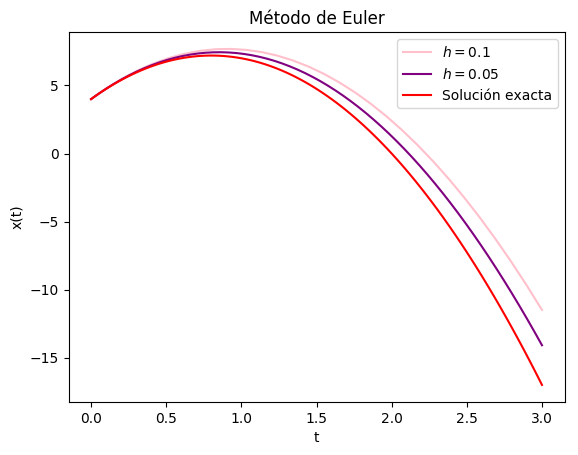

In [14]:
#Graficamos los puntos obtenidos con el método de Euler, considerando h=0.1,0.5
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
plot(t9,x9, color="pink", label = L"h=0.1")
legend()
plot(t10,x10, color="purple", label = L"h=0.05")
legend()
xs = linspace(0,3,100)    #Intervalo a considerar
ys = map(t -> 4+8*t-(5*t^2), xs)
plot(xs,ys,color="red", label = "Solución exacta")  #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

A partir de la gráfica se observa que conforme el tamaño de paso h disminuye, la solución obtenidacon el método de Euler se aproxima cada vez más a la solución exacta.